In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# notebook을 실행한 브라우저에서 바로 그림을 볼 수있게 해주는 명령어
# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

# csv 파일 불러오기
# 파일 경로는 colab이용시 드라이브 경로, vsc이용시 로컬경로
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/google-app-store/Google-Playstore.csv')

# 제대로 불러와졌는지 확인하고싶으면
print(data.shape) # 행, 열의 개수 확인 가능
data # 모든 데이터 확인 가능

# 사용하지 않을 컬럼 제거
data = data.drop(data.columns[[4,5,6,11,12,13,14,15,19,23]], axis=1)

# 결측치 제거
data = data.dropna(axis=0)

# 결측치 제거 후 확인하고싶으면
data.isnull().sum()

(2312944, 24)


App Name            0
App Id              0
Category            0
Rating              0
Maximum Installs    0
Free                0
Price               0
Currency            0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [4]:
data

App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312938                        Lero TOEFL Recorder + Timer   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvien.crm   Productivity     0.0   
3                     cst.stJoseph.ug17ucs548  Communication     5.0   
4                        com.horodyski.grower          Tools     0.0   
...                                       ...            ...     ...   
2312938                        com.toefltimer      Education     3.4   
2312940              com.threedream.oruonline      Education     0.0   
2312941  datastructure.appoworld.datastucture      Education     0.0   
2312942                     ishan.devi.suktam  Music & Audio     3.5   
2312943             com.yyazilim.biliyormusun         Trivia     5.0   

         Maximum Installs  Free  Price Currency      Released  Last Updated  \
0                      15  True    0.0      USD  Feb 26, 2020  Feb 26, 2020   
1                    7662  True    0.0      USD  May 21, 2020  May 06, 2021   
2                      58  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   
3                      19  True    0.0      USD  Sep 10, 2018  Oct 13, 2018   
4                     478  True    0.0      USD  Feb 21, 2020  Nov 12, 2018   
...                   ...   ...    ...      ...           ...           ...   
2312938              1980  True    0.0      USD  May 22, 2018  Dec 14, 2018   
2312940               430  True    0.0      USD  Jan 17, 2018  Feb 02, 2018   
2312941               202  True    0.0      USD  Aug 19, 2018  Aug 19, 2018   
2312942              2635  True    0.0      USD   Aug 1, 2016  May 05, 2021   
2312943               354  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   

        Content Rating  Ad Supported  In App Purchases  Editors Choice  
0             Everyone         False             False           False  
1             Everyone          True             False           False  
2             Everyone         False             False           False  
3             Everyone          True             False           False  
4             Everyone         False             False           False  
...                ...           ...               ...             ...  
2312938       Everyone          True             False           False  
2312940       Everyone         False             False           False  
2312941       Everyone         False             False           False  
2312942       Everyone          True             False           False  
2312943       Everyone          True             False           False  

[2241661 rows x 14 columns]

In [5]:
# 중복데이터 확인

data.duplicated().sum()

0

In [6]:
# 카테고리 개수 확인

len(data.groupby('Category'))

48

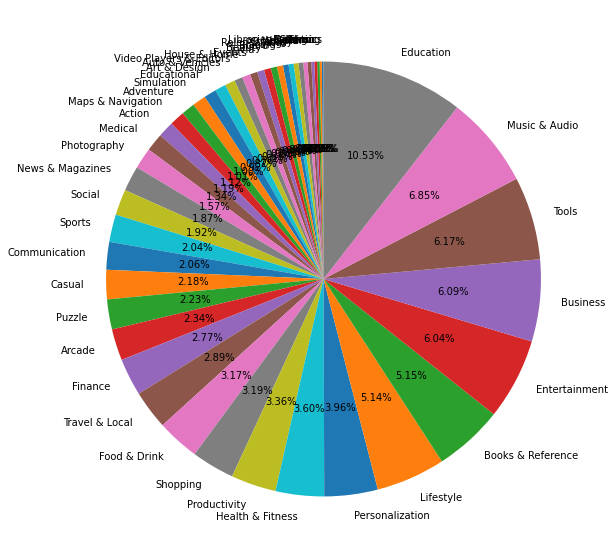

In [7]:
# 카테고리별 데이터 시각화2



category = data.groupby(['Category'])['Category'].count().sort_values()

group_names = category.index
group_sizes = category.values

fig = plt.figure(figsize=(10, 10))


# startangle 로 원 회전
plt.pie(group_sizes, 
        labels = group_names, 
        autopct='%1.2f%%',
        startangle = 90) 


plt.show()

In [8]:
category.unique

<bound method Series.unique of Category
Comics                       2768
Parenting                    3598
Music                        4099
Libraries & Demo             4797
Casino                       4922
Dating                       6328
Weather                      6959
Card                         7915
Strategy                     8076
Word                         8398
Role Playing                 9202
Racing                      10149
Board                       10341
Beauty                      11483
Trivia                      11524
Events                      12386
House & Home                13688
Video Players & Editors     13716
Auto & Vehicles             16957
Art & Design                18309
Educational                 20732
Simulation                  22469
Adventure                   22538
Maps & Navigation           25048
Action                      26619
Medical                     30117
Photography                 35161
News & Magazines            41869
Social  

In [9]:
def floatToInt(x):
  return int(x)
data['IntRating'] = data['Rating'].apply(floatToInt)

data




App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312938                        Lero TOEFL Recorder + Timer   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvien.crm   Productivity     0.0   
3                     cst.stJoseph.ug17ucs548  Communication     5.0   
4                        com.horodyski.grower          Tools     0.0   
...                                       ...            ...     ...   
2312938                        com.toefltimer      Education     3.4   
2312940              com.threedream.oruonline      Education     0.0   
2312941  datastructure.appoworld.datastucture      Education     0.0   
2312942                     ishan.devi.suktam  Music & Audio     3.5   
2312943             com.yyazilim.biliyormusun         Trivia     5.0   

         Maximum Installs  Free  Price Currency      Released  Last Updated  \
0                      15  True    0.0      USD  Feb 26, 2020  Feb 26, 2020   
1                    7662  True    0.0      USD  May 21, 2020  May 06, 2021   
2                      58  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   
3                      19  True    0.0      USD  Sep 10, 2018  Oct 13, 2018   
4                     478  True    0.0      USD  Feb 21, 2020  Nov 12, 2018   
...                   ...   ...    ...      ...           ...           ...   
2312938              1980  True    0.0      USD  May 22, 2018  Dec 14, 2018   
2312940               430  True    0.0      USD  Jan 17, 2018  Feb 02, 2018   
2312941               202  True    0.0      USD  Aug 19, 2018  Aug 19, 2018   
2312942              2635  True    0.0      USD   Aug 1, 2016  May 05, 2021   
2312943               354  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   

        Content Rating  Ad Supported  In App Purchases  Editors Choice  \
0             Everyone         False             False           False   
1             Everyone          True             False           False   
2             Everyone         False             False           False   
3             Everyone          True             False           False   
4             Everyone         False             False           False   
...                ...           ...               ...             ...   
2312938       Everyone          True             False           False   
2312940       Everyone         False             False           False   
2312941       Everyone         False             False           False   
2312942       Everyone          True             False           False   
2312943       Everyone          True             False           False   

         IntRating  
0                0  
1                4  
2                0  
3                5  
4                0  
...            ...  
2312938          3  
2312940          0  
2312941          0  
2312942          3  
2312943          5  

[2241661 rows x 15 columns]

In [10]:
# 평점과 다운로드 수의 상관관계

correlationData = data.groupby('IntRating').aggregate({'Maximum Installs':'median'})

correlationData

Maximum Installs
IntRating                  
0                      83.0
1                    3557.5
2                    6724.0
3                   10145.0
4                    6126.0
5                     250.0

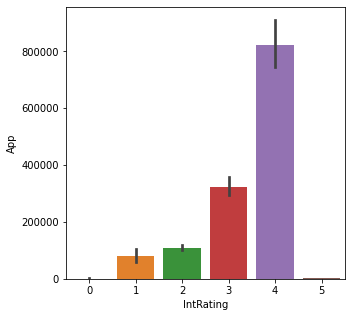

In [11]:
plt.figure(figsize=(5,5))

sns.barplot(
    data= data,
    x= "IntRating",
    y= "Maximum Installs"
)
plt.ylabel('App')
plt.show()

### 데이터 전처리



In [12]:
# 다운로드 수가 500이하 이고, 평점이 0.0인 데이터 삭제하기

idx_rating_0 = data[(data['Rating'] == 0.0) & (data['Maximum Installs'] <= 500) ].index

data_2 = data.drop(idx_rating_0)

data_2

App Name  \
1                                      Ampere Battery Info   
3        Smart City Trichy Public Service Vehicles 17UC...   
6                         unlimited 4G data prank free app   
7                                    The Everyday Calendar   
9                         Neon 3d Iron Tech Keyboard Theme   
...                                                    ...   
2312933                     Caustic Editor for VolcaSample   
2312935                                   Floral Wallpaper   
2312938                        Lero TOEFL Recorder + Timer   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                                App Id          Category  \
1                           com.webserveis.batteryinfo             Tools   
3                              cst.stJoseph.ug17ucs548     Communication   
6        getfreedata.superfatiza.unlimitedjiodataprank  Libraries & Demo   
7                               com.mozaix.simoneboard         Lifestyle   
9                com.ikeyboard.theme.neon_3d.iron.tech   Personalization   
...                                                ...               ...   
2312933               com.singlecellsoftware.kvsampler     Music & Audio   
2312935                     com.arfdev.floralwallpaper   Personalization   
2312938                                 com.toefltimer         Education   
2312942                              ishan.devi.suktam     Music & Audio   
2312943                      com.yyazilim.biliyormusun            Trivia   

         Rating  Maximum Installs  Free  Price Currency      Released  \
1           4.4              7662  True    0.0      USD  May 21, 2020   
3           5.0                19  True    0.0      USD  Sep 10, 2018   
6           4.5              2567  True    0.0      USD  Sep 23, 2019   
7           2.0               702  True    0.0      USD  Jun 21, 2019   
9           4.7             62433  True    0.0      USD  Sep 22, 2019   
...         ...               ...   ...    ...      ...           ...   
2312933     4.0            814548  True    0.0      USD  Dec 11, 2014   
2312935     0.0              1302  True    0.0      USD  Jul 19, 2018   
2312938     3.4              1980  True    0.0      USD  May 22, 2018   
2312942     3.5              2635  True    0.0      USD   Aug 1, 2016   
2312943     5.0               354  True    0.0      USD   Aug 9, 2019   

         Last Updated Content Rating  Ad Supported  In App Purchases  \
1        May 06, 2021       Everyone          True             False   
3        Oct 13, 2018       Everyone          True             False   
6        Sep 27, 2019       Everyone          True             False   
7        Jun 21, 2019       Everyone         False             False   
9        Oct 07, 2020       Everyone          True             False   
...               ...            ...           ...               ...   
2312933  Dec 11, 2014       Everyone         False             False   
2312935  Nov 13, 2019       Everyone          True             False   
2312938  Dec 14, 2018       Everyone          True             False   
2312942  May 05, 2021       Everyone          True             False   
2312943  Aug 19, 2019       Everyone          True             False   

         Editors Choice  IntRating  
1                 False          4  
3                 False          5  
6                 False          4  
7                 False          2  
9                 False          4  
...                 ...        ...  
2312933           False          4  
2312935           False          0  
2312938           False          3  
2312942           False          3  
2312943           False          5  

[1374925 rows x 15 columns]

In [13]:
#  영어, 숫자를 제외한 다른 언어 이름으로 된 앱 제거하기 
import re

data['New App Name'] = [re.sub('[^A-Za-z0-9]', '--', s) for s in data['App Name']]


data



App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312938                        Lero TOEFL Recorder + Timer   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvien.crm   Productivity     0.0   
3                     cst.stJoseph.ug17ucs548  Communication     5.0   
4                        com.horodyski.grower          Tools     0.0   
...                                       ...            ...     ...   
2312938                        com.toefltimer      Education     3.4   
2312940              com.threedream.oruonline      Education     0.0   
2312941  datastructure.appoworld.datastucture      Education     0.0   
2312942                     ishan.devi.suktam  Music & Audio     3.5   
2312943             com.yyazilim.biliyormusun         Trivia     5.0   

         Maximum Installs  Free  Price Currency      Released  Last Updated  \
0                      15  True    0.0      USD  Feb 26, 2020  Feb 26, 2020   
1                    7662  True    0.0      USD  May 21, 2020  May 06, 2021   
2                      58  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   
3                      19  True    0.0      USD  Sep 10, 2018  Oct 13, 2018   
4                     478  True    0.0      USD  Feb 21, 2020  Nov 12, 2018   
...                   ...   ...    ...      ...           ...           ...   
2312938              1980  True    0.0      USD  May 22, 2018  Dec 14, 2018   
2312940               430  True    0.0      USD  Jan 17, 2018  Feb 02, 2018   
2312941               202  True    0.0      USD  Aug 19, 2018  Aug 19, 2018   
2312942              2635  True    0.0      USD   Aug 1, 2016  May 05, 2021   
2312943               354  True    0.0      USD   Aug 9, 2019  Aug 19, 2019   

        Content Rating  Ad Supported  In App Purchases  Editors Choice  \
0             Everyone         False             False           False   
1             Everyone          True             False           False   
2             Everyone         False             False           False   
3             Everyone          True             False           False   
4             Everyone         False             False           False   
...                ...           ...               ...             ...   
2312938       Everyone          True             False           False   
2312940       Everyone         False             False           False   
2312941       Everyone         False             False           False   
2312942       Everyone          True             False           False   
2312943       Everyone          True             False           False   

         IntRating                                       New App Name  
0                0                                            Gakondo  
1                4                              Ampere--Battery--Info  
2                0                                             Vibook  
3                5  Smart--City--Trichy--Public--Service--Vehicles...  
4                0                                           GROW--me  
...            ...                                                ...  
2312938          3                   Lero--TOEFL--Recorder------Timer  
2312940          0        

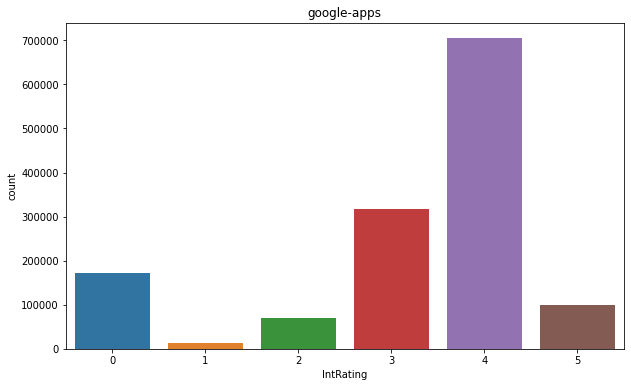

In [14]:
plt.figure(figsize=(10,6))

sns.countplot(data = data_2, x = "IntRating")
plt.title('google-apps')

plt.show()

### [1] 유저 수요는 높지만, 만족도가 평균치보다 낮아 도전해볼만한 시장분석하기

In [15]:
# 별점 3점대 앱 데이터를 분리하여 변수에 저장하기
rating_3_data =  data_2[data_2["IntRating"]== 3].sort_values('Maximum Installs', ascending = False).reset_index(drop =True)

rating_3_data 

App Name  \
0                                        Instagram   
1                                    Facebook Lite   
2                                         Briefing   
3                                   Samsung Health   
4                                          Twitter   
...                                            ...   
317552                               RID Benchmark   
317553     Happy Diwali 2019 -  Video Status Songs   
317554  Fish.me - Fresh Seafood. Same day delivery   
317555                                MAAC KOLKATA   
317556                                    Salaires   

                             App Id           Category  Rating  \
0             com.instagram.android             Social     3.8   
1                 com.facebook.lite             Social     3.1   
2               flipboard.boxer.app   News & Magazines     3.9   
3       com.sec.android.app.shealth   Health & Fitness     3.6   
4               com.twitter.android             Social     3.5   
...                             ...                ...     ...   
317552          th.go.rid_benchmark  Maps & Navigation     3.9   
317553      com.diwali.video.status             Events     3.7   
317554            me.fish.fishbuyer           Shopping     3.5   
317555     maackolkata.beta.v_0_0_3          Education     3.7   
317556          com.kerweb.salaires            Finance     3.8   

        Maximum Installs  Free  Price Currency      Released  Last Updated  \
0             3559871277  True    0.0      USD   Apr 3, 2012  Jun 14, 2021   
1             2072296494  True    0.0      USD  Mar 15, 2018  Jun 14, 2021   
2             1400441959  True    0.0      USD  May 13, 2015  Jun 08, 2021   
3             1341624888  True    0.0      USD   Apr 7, 2015  May 17, 2021   
4             1144061939  True    0.0      USD  Apr 30, 2010  Jun 14, 2021   
...                  ...   ...    ...      ...           ...           ...   
317552                 0  True    0.0      USD  Apr 19, 2019  Apr 19, 2019   
317553                 0  True    0.0      USD  Oct 11, 2019  Oct 11, 2019   
317554                 0  True    0.0      USD   May 5, 2018  Apr 30, 2018   
317555                 0  True    0.0      USD   Mar 7, 2019  Mar 07, 2019   
317556                 0  True    0.0      USD  Aug 25, 2018  Aug 25, 2018   

       Content Rating  Ad Supported  In App Purchases  Editors Choice  \
0                Teen          True              True            True   
1                Teen          True             False           False   
2        Everyone 10+          True             False           False   
3            Everyone          True             False           False   
4          Mature 17+          True             False           False   
...               ...           ...               ...             ...   
317552       Everyone         False             False           False   
317553           Teen          True             False           False   
317554       Everyone         False             False           False   
317555       Everyone         False             False           False   
317556       Everyone         False             False           False   

        IntRating  
0               3  
1               3  
2               3  
3               3  
4               3  
...           ...  
317552          3  
317553          3  
317554          3  
317555          3  
317556          3  

[317557 rows x 15 columns]

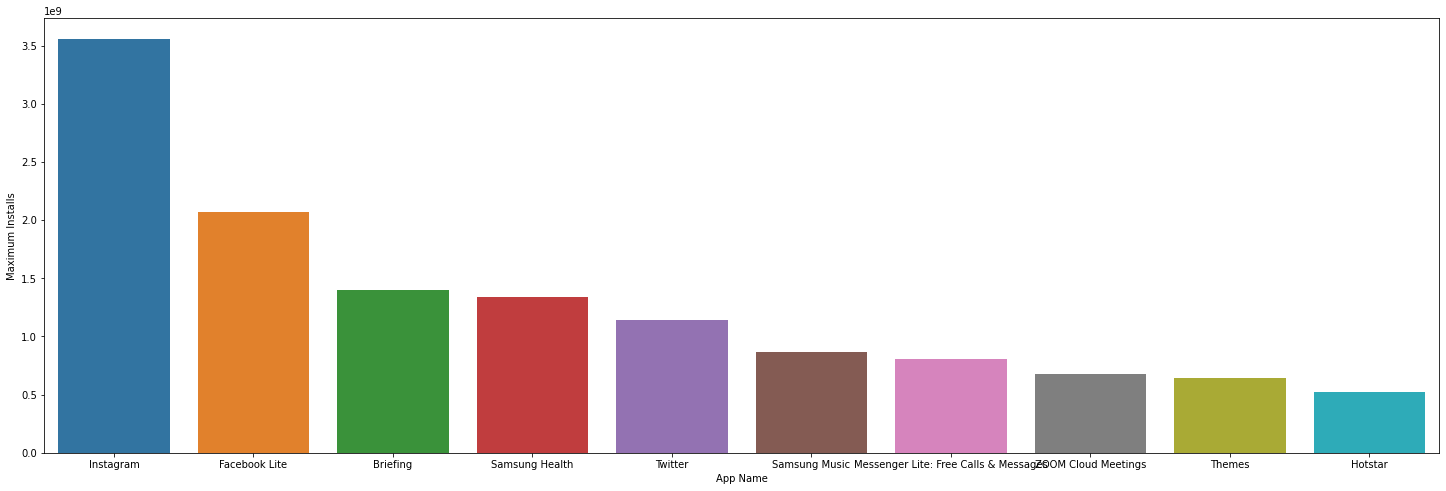

In [16]:
# 별점 3점대 앱 데이터 설치수 기준으로 시각화하기
plt.figure(figsize=(25,8))


sns.barplot(data = rating_3_data[:10], x = "App Name", y = "Maximum Installs")

plt.show()

In [17]:
# 앱의 수요는 어떻게 될까? 
# 평점 3점대 어플 임에도 불구하고, 설치를 많이한 어플 데이터를 뽑고 그 카테고리를 보자!

topInstalls_rating_3 = rating_3_data[rating_3_data["Maximum Installs"] >= 1000000].reset_index(drop = True)

topInstalls_rating_3


App Name  \
0                                         Instagram   
1                                     Facebook Lite   
2                                          Briefing   
3                                    Samsung Health   
4                                           Twitter   
...                                             ...   
12955       Royal Indian Wedding and Honeymoon Days   
12956                                      Railcard   
12957            fake call princess prank Simulator   
12958  Flying Superhero War -  Grand City Emergency   
12959                Snakes & Ladders: Online Dice!   

                                                  App Id          Category  \
0                                  com.instagram.android            Social   
1                                      com.facebook.lite            Social   
2                                    flipboard.boxer.app  News & Magazines   
3                            com.sec.android.app.shealth  Health & Fitness   
4                                    com.twitter.android            Social   
...                                                  ...               ...   
12955                      com.bhargavapps.honeymoondays     Entertainment   
12956                     com.raildeliverygroup.railcard    Travel & Local   
12957                     com.princesscall.fakecallprank      Art & Design   
12958  com.twgames.flying.superhero.grand.city.rescue...      Role Playing   
12959                       com.playzio.snakesandladders             Board   

       Rating  Maximum Installs  Free  Price Currency      Released  \
0         3.8        3559871277  True    0.0      USD   Apr 3, 2012   
1         3.1        2072296494  True    0.0      USD  Mar 15, 2018   
2         3.9        1400441959  True    0.0      USD  May 13, 2015   
3         3.6        1341624888  True    0.0      USD   Apr 7, 2015   
4         3.5        1144061939  True    0.0      USD  Apr 30, 2010   
...       ...               ...   ...    ...      ...           ...   
12955     3.9           1000108  True    0.0      USD  Jan 31, 2019   
12956     3.8           1000095  True    0.0      USD   Aug 7, 2017   
12957     3.5           1000056  True    0.0      USD  Dec 22, 2019   
12958     3.8           1000055  True    0.0      USD   Jan 7, 2020   
12959     3.8           1000022  True    0.0      USD  Apr 21, 2017   

       Last Updated Content Rating  Ad Supported  In App Purchases  \
0      Jun 14, 2021           Teen          True              True   
1      Jun 14, 2021           Teen          True             False   
2      Jun 08, 2021   Everyone 10+          True             False   
3      May 17, 2021       Everyone          True             False   
4      Jun 14, 2021     Mature 17+          True             False   
...             ...            ...           ...               ...   
12955  Aug 27, 2020           Teen          True             False   
12956  Oct 27, 2020       Everyone         False             False   
12957  Nov 05, 2020       Everyone          True             False   
12958  Jan 07, 2020           Teen          True              True   
12959  Jun 15, 2020       Everyone         False             False   

       Editors Choice  IntRating  
0                True          3  
1               False          3  
2               False          3  
3               False          3  
4               False          3  
...               ...        ...  
12955           False          3  
12956           False          3  
12957           False          3  
12958           False          3  
12959           False          3  

[12960 rows x 15 columns]

In [18]:
#  전체 앱 중 100만 이상 설치 수 인 앱 데이터 

topInstalls= data_2[data_2["Maximum Installs"] >= 1000000].reset_index(drop = True)

topInstalls

App Name  \
0           Car Games Revival: Car Racing Games for Kids   
1                                     Smart File Manager   
2                              Transmute Robot Superhero   
3                                          Photo Collage   
4                                          Taxsee Driver   
...                                                  ...   
46296                      Tuk Tuk Auto Rickshaw Driving   
46297              Snake Evolution - Mutant Serpent Game   
46298                 3 Days to Die - Escape Horror Game   
46299  Modern Strike : Multiplayer FPS - Critical Action   
46300                            Hopeless 2: Cave Escape   

                                                 App Id           Category  \
0      com.lf.real.extreme.suv.offroad.drive.games.free             Racing   
1                         com.smartwho.SmartFileManager       Productivity   
2                     com.crsh.transmute.robotsuperhero          Lifestyle   
3                                   com.ss.instacollage        Photography   
4                                     com.taxsee.driver  Maps & Navigation   
...                                                 ...                ...   
46296           com.zingminegamecraftgame.tuktukrikshaw         Simulation   
46297                       br.com.tapps.snakeevolution             Casual   
46298                  com.night.die.horror.excape.game             Arcade   
46299                        com.shoot.hotheadgame.anti       Role Playing   
46300                               com.upopa.hopeless2             Action   

       Rating  Maximum Installs  Free  Price Currency      Released  \
0         3.9          30052692  True    0.0      USD   Nov 9, 2016   
1         4.4           3741253  True    0.0      USD  Feb 21, 2011   
2         3.9           3986369  True    0.0      USD  Mar 31, 2017   
3         3.6           2534748  True    0.0      USD   Jul 3, 2014   
4         4.4           6864573  True    0.0      USD  Oct 27, 2011   
...       ...               ...   ...    ...      ...           ...   
46296     3.9           1299098  True    0.0      USD  Apr 29, 2016   
46297     4.4           1193422  True    0.0      USD  Jan 19, 2018   
46298     4.2           3523403  True    0.0      USD  Mar 23, 2019   
46299     3.9          24015387  True    0.0      USD   Aug 6, 2020   
46300     4.3           7274660  True    0.0      USD  Oct 29, 2015   

       Last Updated Content Rating  Ad Supported  In App Purchases  \
0      Jun 12, 2021       Everyone          True              True   
1      Jan 01, 2021       Everyone          True             False   
2      Aug 17, 2020           Teen          True              True   
3      Sep 26, 2018       Everyone          True             False   
4      May 24, 2021       Everyone         False             False   
...             ...            ...           ...               ...   
46296  Mar 08, 2018       Everyone          True             False   
46297  May 19, 2021       Everyone          True              True   
46298  Jul 23, 2020           Teen          True              True   
46299  May 12, 2021           Teen          True              True   
46300  Mar 06, 2017           Teen          True              True   

       Editors Choice  IntRating  
0               False          3  
1               False          4  
2               False          3  
3               False          3  
4               False          4  
...               ...        ...  
46296           False          3  
46297           False          4  
46298           False          4  
46299           False          3  
46300           False          4  

[46301 rows x 15 columns]

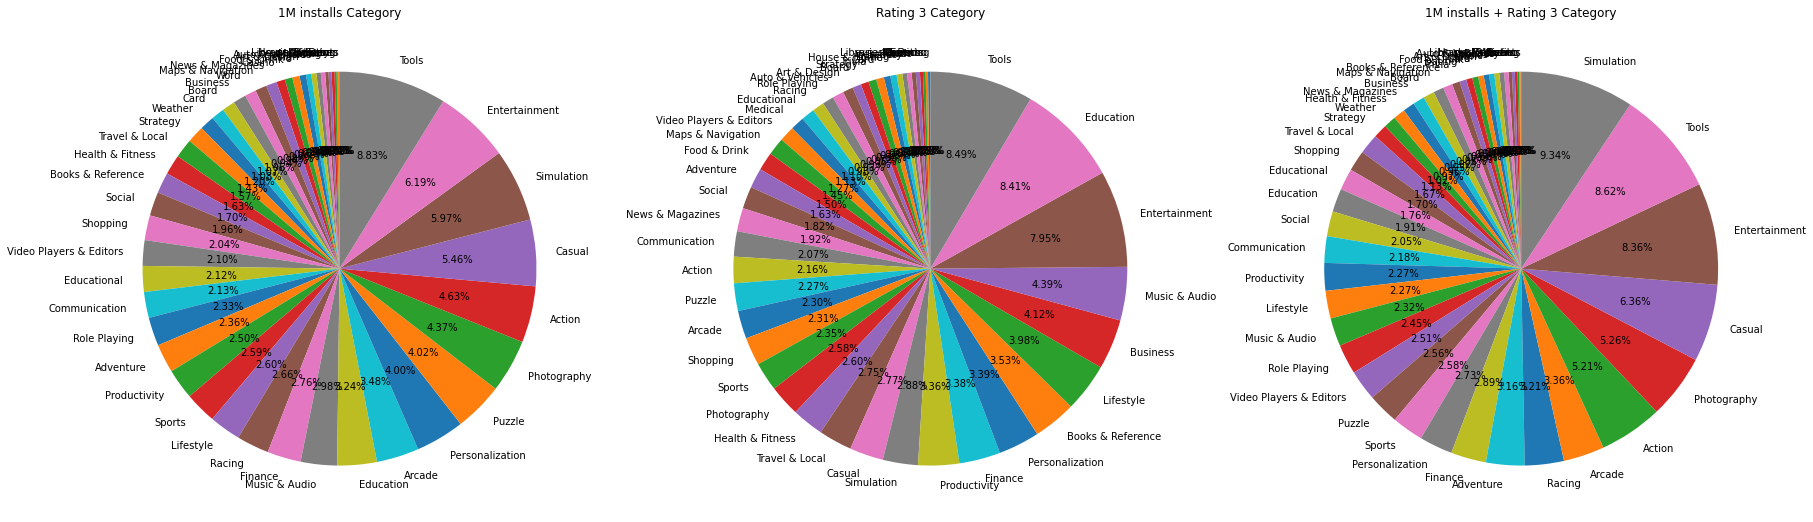

In [19]:
# 별점 3점대 앱 데이터 특징 찾아보기

# 전체 앱  + 100만 설치수 인 앱 중 가장 많은 카테고리는?

topInstalls_category = topInstalls.groupby(['Category'])['Category'].count().sort_values()

group_names_top = topInstalls_category.index
group_sizes_top = topInstalls_category.values



# 3점대 어플의 가장 많은 카테고리는?

rating_3_category = rating_3_data.groupby(['Category'])['Category'].count().sort_values()

group_names_rating3 = rating_3_category.index
group_sizes_rating3 = rating_3_category.values

# 100만 설치 수 + 평점 3점대 어플의 가장 많은 카테고리는?

topInstalls_rating_3_category = topInstalls_rating_3.groupby(['Category'])['Category'].count().sort_values()

group_names_top_rating3 = topInstalls_rating_3_category.index
group_sizes_top_rating3 = topInstalls_rating_3_category.values

fig = plt.figure(figsize=(30, 20))

# 전체 앱 + 100만 설치수  
plt.subplot(131)
plt.pie(group_sizes_top, 
        labels = group_names_top, 
        autopct='%1.2f%%',
        startangle = 90) 
plt.title('1M installs Category')



# 3점대 어플 카테고리
plt.subplot(132)
plt.pie(group_sizes_rating3, 
        labels = group_names_rating3, 
        autopct='%1.2f%%',
        startangle = 90) 
plt.title('Rating 3 Category')



# 100만 설치 수 + 3점대 어플
plt.subplot(133)
plt.pie(group_sizes_top_rating3, 
        labels = group_names_top_rating3, 
        autopct='%1.2f%%',
        startangle = 90) 
plt.title('1M installs + Rating 3 Category')

plt.show()






100만 이상 다운로드 & 평점 3점대인 어플의 카테고리 비율 1위는 Simulation 이 나왔습니다.   <br/>

이를 분석하면, 

<br/>

첫째, 전체 앱 카테고리 에서 simulation 카테고리는 27위로 낮은 편입니다.<br/>   이를 통해 출시되는 앱의 수가 적은편이라는 것을 알 수 있습니다. <br/> 

반면, 100만 다운로드 이상되는 앱 중에서 simulation 카테고리는 3위로 높은 편입니다.<br/> 이를통해, simulation app 의 수요가 높은 편이라고 볼 수있습니다. 

<br/>

둘째, 만족도가 최빈값보다 낮은 3점대 어플 중 Simulation 카테고리의 순위는 11위 입니다. <br/> 반면, 100만 다운로드 이상이면서, 평점 3점대 인 앱 중 simulation 카테고리는 1위입니다. <br/> 
이를통해, 만족도가 최빈값보다 약간 낮은 평점 3점대 어플에서 simulation 카테고리가 가장 수요가높다는 것을 알 수 있습니다. 
<br/>

즉, Simulation 카테고리가 수요는 높지만, 만족도가 평균치 보다 낮아 도전해 볼만한 시장이라 볼 수 있을 것 같습니다. 